**Mean Squared Error (MSE):<br><br>**
J(θ) = (1/2m) * Σ(h(x) - y)²
where:
- h(x) = θ₀ + θ₁x (prediction)
- m = number of samples
- θ₀ = intercept, θ₁ = slope

**Gradient Descent Algorithm<br><br>**
Update Rule:<br>

- θ₀ = θ₀ - α * (1/m) * Σ(h(x) - y)
- θ₁ = θ₁ - α * (1/m) * Σ(h(x) - y) * x
- where α = learning rate

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def gradient_descent(x, y, learning_rate=0.01, iterations=1000):
    m = len(y)
    theta = np.zeros(2)
    cost_history = []
    
    for i in range(iterations):
        h = theta[0] + theta[1] * x
        
        grad_0 = (1/m) * np.sum(h - y)  # Gradient for intercept
        grad_1 = (1/m) * np.sum((h - y) * x)  # Gradient for slope
        
        # Update parameters
        theta[0] = theta[0] - learning_rate * grad_0
        theta[1] = theta[1] - learning_rate * grad_1
        
        # Calculate cost
        cost = (1/(2*m)) * np.sum((h - y)**2)
        cost_history.append(cost)
        
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost:.4f}, Theta = {theta}")
    
    return theta, cost_history


# Generate data
np.random.seed(42)
X = np.random.rand(100) * 10
y = 2.5 * X + 1.5 + np.random.randn(100) * 2


theta, costs = gradient_descent(X, y, learning_rate=0.01, iterations=1000)

print(f"\nFinal parameters:")
print(f"Intercept (θ₀): {theta[0]:.2f}")
print(f"Slope (θ₁): {theta[1]:.2f}")

Iteration 0: Cost = 114.8282, Theta = [0.13252358 0.83408112]
Iteration 100: Cost = 1.8024, Theta = [0.77889916 2.58499716]
Iteration 200: Cost = 1.7217, Theta = [1.0580823  2.54208718]
Iteration 300: Cost = 1.6755, Theta = [1.26956485 2.50958267]
Iteration 400: Cost = 1.6489, Theta = [1.42976388 2.48496035]
Iteration 500: Cost = 1.6337, Theta = [1.55111541 2.46630883]
Iteration 600: Cost = 1.6249, Theta = [1.64303976 2.45218021]
Iteration 700: Cost = 1.6199, Theta = [1.7126729  2.44147772]
Iteration 800: Cost = 1.6170, Theta = [1.76542033 2.43337053]
Iteration 900: Cost = 1.6154, Theta = [1.80537675 2.42722929]

Final parameters:
Intercept (θ₀): 1.84
Slope (θ₁): 2.42


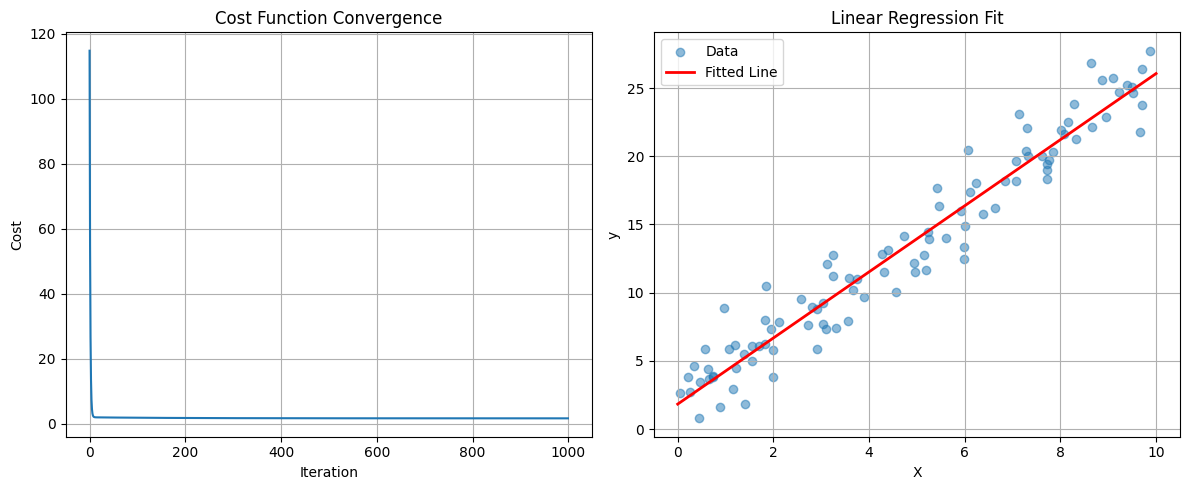

In [8]:
# Visualize cost convergence
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(costs)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(X, y, alpha=0.5, label='Data')
x_line = np.linspace(0, 10, 100)
y_line = theta[0] + theta[1] * x_line
plt.plot(x_line, y_line, 'r-', linewidth=2, label='Fitted Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

**Learning Rate Selection**

C:\Users\User\AppData\Local\Temp\ipykernel_11152\1272743624.py:17: RuntimeWarning: overflow encountered in square
  cost = (1/(2*m)) * np.sum((h - y)**2)
C:\Users\User\AppData\Local\Temp\ipykernel_11152\1272743624.py:14: RuntimeWarning: invalid value encountered in scalar subtract
  theta[1] = theta[1] - learning_rate * grad_1


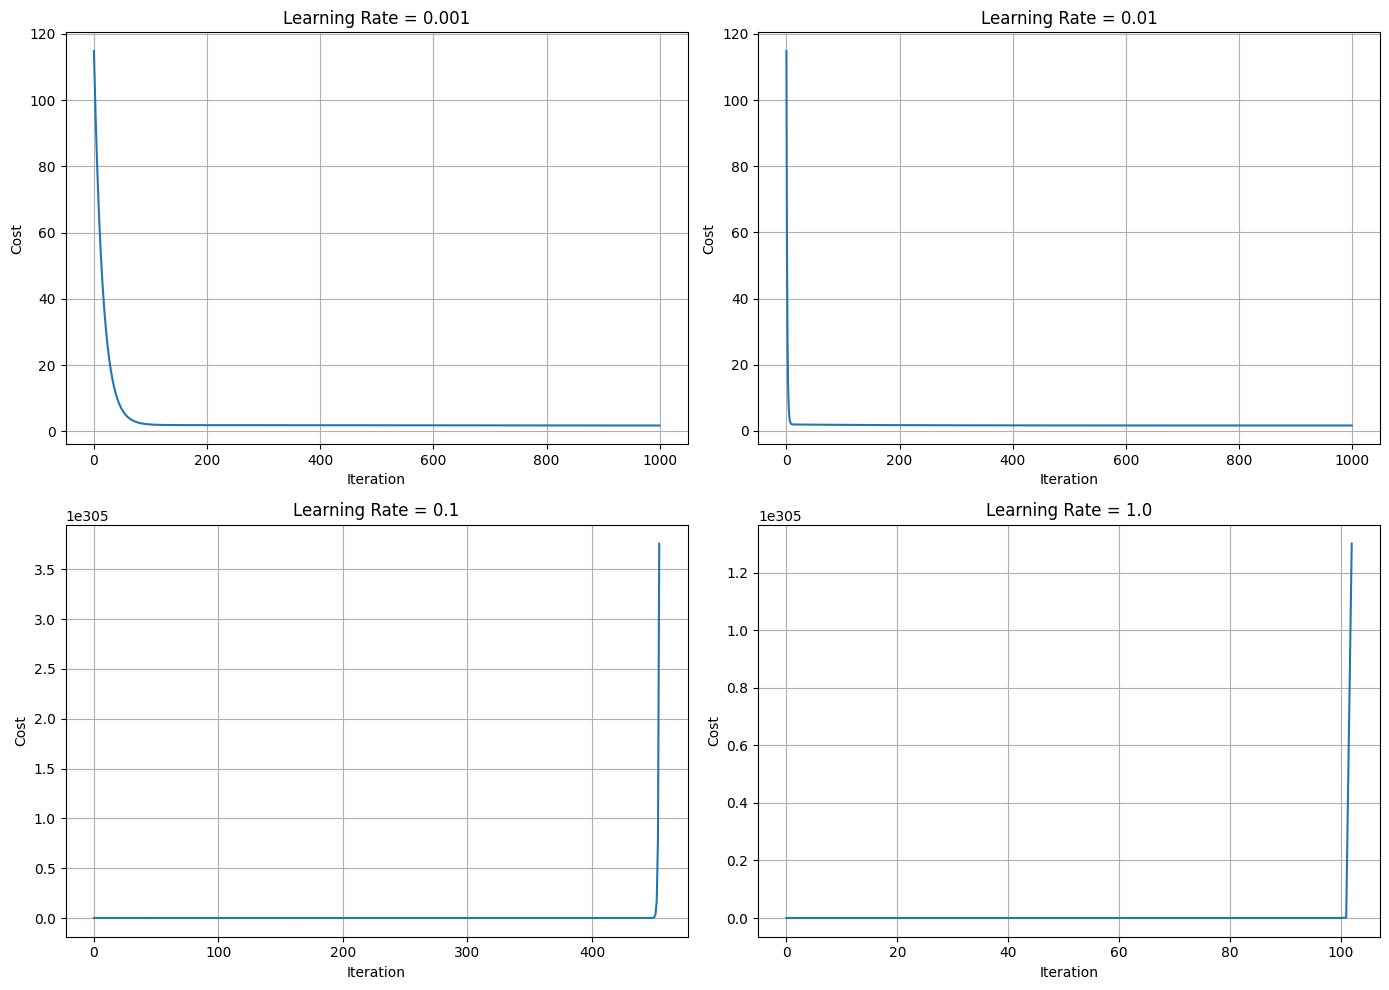

In [9]:
learning_rates = [0.001, 0.01, 0.1, 1.0]
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for idx, lr in enumerate(learning_rates):
    theta, costs = gradient_descent(X, y, learning_rate=lr, iterations=1000)
    axes[idx//2, idx%2].plot(costs)
    axes[idx//2, idx%2].set_title(f'Learning Rate = {lr}')
    axes[idx//2, idx%2].set_xlabel('Iteration')
    axes[idx//2, idx%2].set_ylabel('Cost')
    axes[idx//2, idx%2].grid(True)

plt.tight_layout()
plt.show()